## Model for the Face Shape Prediciton problem

### Extract and label the dataset

In [3]:
import os
import tensorflow as tf
from keras.preprocessing.image import img_to_array, load_img

def extract_dataset(main_folder, image_size=(128, 128)):
    dataset = []
    labels = []
    
    # Define a dictionary to map each shape to a unique label
    shape_labels = {'oblong': 0, 'square': 1, 'round': 2,'heart': 3, 'oval': 4}

    # Loop through shapes in the main folder
    for shape in shape_labels:
        shape_folder = os.path.join(main_folder, shape)
        label = shape_labels[shape]

        # Loop through images in the shape subfolder
        for filename in os.listdir(shape_folder):
            if filename.endswith(('.jpg', '.jpeg', '.png', '.JPG')):  # Add more image formats if needed
                image_path = os.path.join(shape_folder, filename)

                # Load the image using TensorFlow and convert to grayscale
                img = load_img(image_path, color_mode='grayscale', target_size=image_size)
                img_array = img_to_array(img)

                # Normalize the pixel values to the range [0, 1]
                img_array /= 255.0

                # Append the image data and label to the dataset
                dataset.append(img_array)
                labels.append(label)

    return dataset, labels


In [4]:
data_path = './Augmentation/'
dataset, labels = extract_dataset(data_path)

In [32]:
print(len(dataset))
print(dataset[0][0].shape)
print(dataset[0][0])

2922
(128, 1)
[[0.5921569 ]
 [0.58431375]
 [0.5882353 ]
 [0.58431375]
 [0.58431375]
 [0.58431375]
 [0.5882353 ]
 [0.59607846]
 [0.5882353 ]
 [0.59607846]
 [0.59607846]
 [0.5882353 ]
 [0.58431375]
 [0.5882353 ]
 [0.5882353 ]
 [0.58431375]
 [0.5921569 ]
 [0.58431375]
 [0.5803922 ]
 [0.5882353 ]
 [0.5921569 ]
 [0.58431375]
 [0.58431375]
 [0.5882353 ]
 [0.58431375]
 [0.58431375]
 [0.5921569 ]
 [0.58431375]
 [0.5882353 ]
 [0.59607846]
 [0.58431375]
 [0.5803922 ]
 [0.58431375]
 [0.58431375]
 [0.5882353 ]
 [0.58431375]
 [0.5803922 ]
 [0.5882353 ]
 [0.5921569 ]
 [0.5803922 ]
 [0.58431375]
 [0.5882353 ]
 [0.5921569 ]
 [0.5921569 ]
 [0.5882353 ]
 [0.58431375]
 [0.5882353 ]
 [0.5921569 ]
 [0.5921569 ]
 [0.58431375]
 [0.5882353 ]
 [0.5882353 ]
 [0.5803922 ]
 [0.5803922 ]
 [0.5882353 ]
 [0.5882353 ]
 [0.5921569 ]
 [0.5921569 ]
 [0.58431375]
 [0.5882353 ]
 [0.5921569 ]
 [0.5921569 ]
 [0.58431375]
 [0.5921569 ]
 [0.5921569 ]
 [0.5882353 ]
 [0.5882353 ]
 [0.5882353 ]
 [0.58431375]
 [0.5921569 ]
 [0.59

In [5]:
print(len(labels))
print(labels)

2922
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [6]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np


In [13]:
# Define the VGGNet16 model
def create_vggnet16_model(input_shape=(128, 128, 1)):
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(5, activation='softmax'))
    model.summary()
    return model

In [8]:
def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    
    # Get unique classes from the data
    unique_classes = np.unique(np.concatenate([y_true, y_pred]))

    # Display confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
    disp.plot(cmap='Blues', values_format='d')

    # Update tick locations based on unique classes
    plt.xticks(np.arange(len(unique_classes)), unique_classes, rotation=45)
    plt.yticks(np.arange(len(unique_classes)), unique_classes)
    
    plt.show()


In [12]:
def train_vgg(dataset, labels, learning_rate=0.001, batch_size=32, test_size=0.2, epochs=10, patience=3):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=test_size, random_state=42)

    # Create and compile the VGGNet16 model
    model = create_vggnet16_model()
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    # Train the model
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

    # Print test loss, test accuracy, train loss, train accuracy
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    train_loss, train_accuracy = model.evaluate(X_train, y_train)
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")

    # Plot train loss and validation loss over epochs
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Predict on test set
    y_pred = model.predict(X_test)

    # Convert predictions to class labels
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Get class names
    class_names = ['oblong', 'square', 'round','heart','oval']

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred_classes, target_names=class_names))
    # Plot confusion matrix
    plot_confusion_matrix(y_test, y_pred_classes, classes=class_names)
    # Assuming y_test and y_pred are not one-hot encoded
    n_classes = len(class_names)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        # Create one-hot encoded labels for the current class
        y_test_one_hot = np.array([1 if label == i else 0 for label in y_test])
        y_pred_one_hot = y_pred[:, i]

        # Calculate ROC curve and AUC for the current class
        fpr[i], tpr[i], _ = roc_curve(y_test_one_hot, y_pred_one_hot)
        roc_auc[i] = auc(fpr[i], tpr[i])

        # Plot ROC curve for each class
        plt.figure()
        plt.plot(fpr[i], tpr[i], color='darkorange', lw=2, label=f'{class_names[i]} ROC curve (area = {roc_auc[i]:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{class_names[i]} ROC Curve')
        plt.legend(loc='lower right')
        plt.show()


    return model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 128, 128, 64)      640       
                                                                 
 conv2d_15 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 64, 64, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 32, 32, 128)       0         
 g2D)                                                 

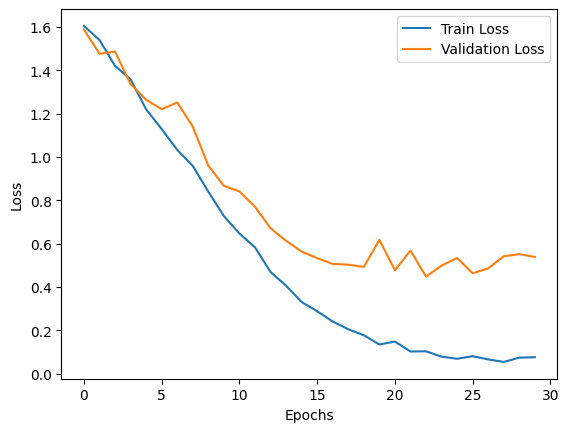

19/19 [==============================] - 10s 514ms/step
Classification Report:
              precision    recall  f1-score   support

      oblong       0.91      0.87      0.89       136
      square       0.87      0.95      0.91       108
       round       0.95      0.90      0.93       111
       heart       0.85      0.81      0.83       114
        oval       0.82      0.88      0.85       116

    accuracy                           0.88       585
   macro avg       0.88      0.88      0.88       585
weighted avg       0.88      0.88      0.88       585



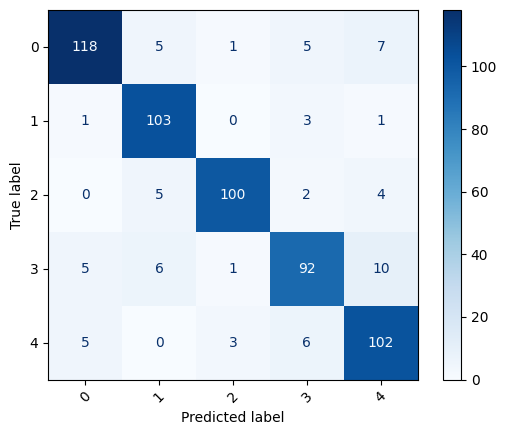

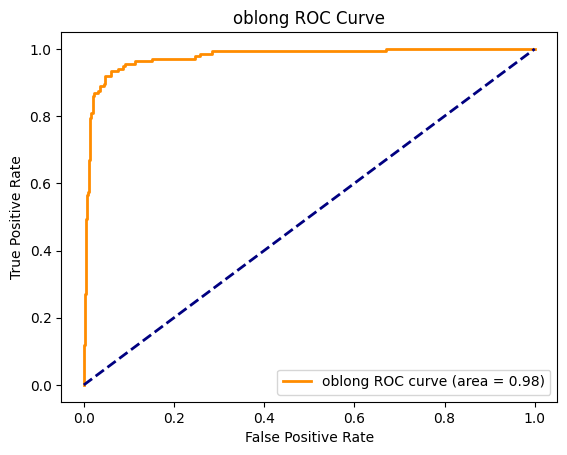

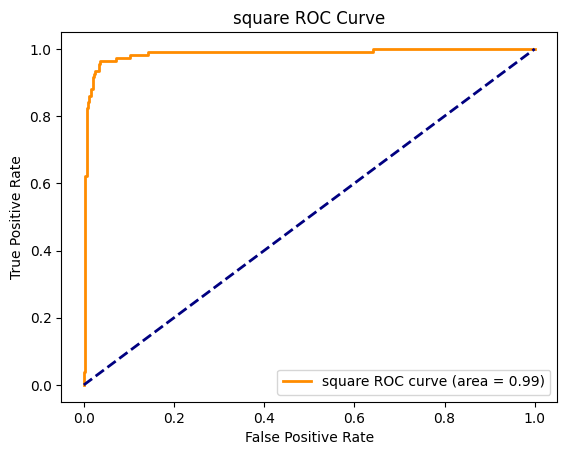

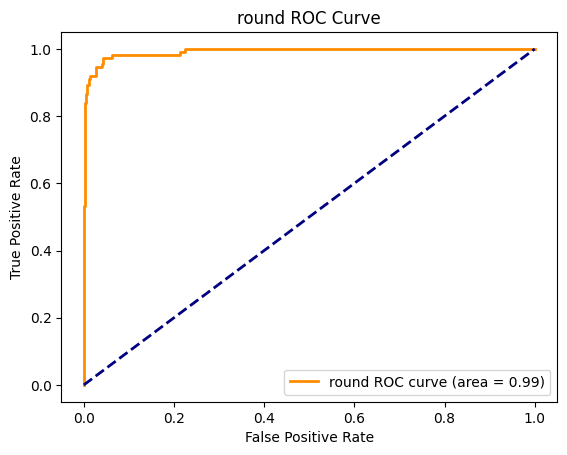

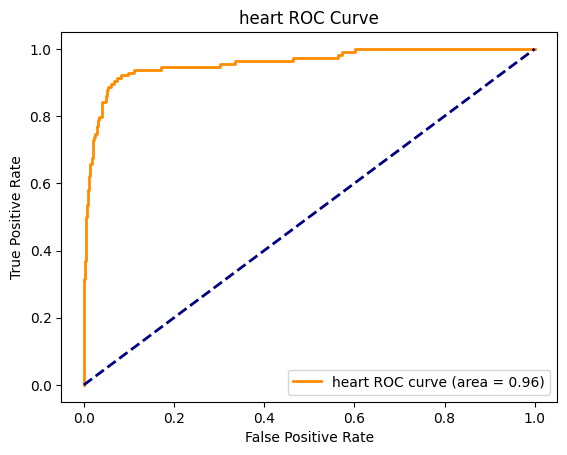

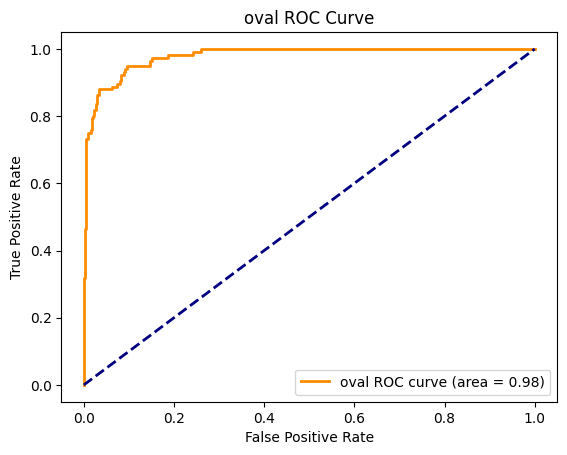

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# optimized 

dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.0001, batch_size=128, test_size=0.2, epochs=30, patience=7)
model.save('shape2.h5')

Epoch 1/30
19/19 [==============================] - 222s 11s/step - loss: 1.6094 - accuracy: 0.2242 - val_loss: 1.6077 - val_accuracy: 0.1949
Epoch 2/30
19/19 [==============================] - 209s 11s/step - loss: 1.5937 - accuracy: 0.2679 - val_loss: 1.5361 - val_accuracy: 0.3624
Epoch 3/30
19/19 [==============================] - 203s 11s/step - loss: 1.4888 - accuracy: 0.3325 - val_loss: 1.4462 - val_accuracy: 0.3726
Epoch 4/30
19/19 [==============================] - 204s 11s/step - loss: 1.4215 - accuracy: 0.3855 - val_loss: 1.4203 - val_accuracy: 0.3863
Epoch 5/30
19/19 [==============================] - 205s 11s/step - loss: 1.3552 - accuracy: 0.4099 - val_loss: 1.4480 - val_accuracy: 0.4103
Epoch 6/30
19/19 [==============================] - 200s 11s/step - loss: 1.2924 - accuracy: 0.4728 - val_loss: 1.3132 - val_accuracy: 0.4667
Epoch 7/30
19/19 [==============================] - 206s 11s/step - loss: 1.1552 - accuracy: 0.5477 - val_loss: 1.1688 - val_accuracy: 0.5179
Epoch 

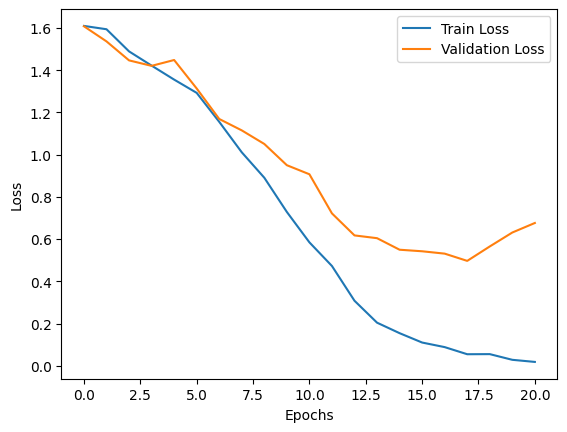

19/19 [==============================] - 11s 584ms/step
Classification Report:
              precision    recall  f1-score   support

      oblong       0.91      0.85      0.88       136
      square       0.91      0.92      0.91       108
       round       0.94      0.89      0.92       111
       heart       0.80      0.83      0.82       114
        oval       0.83      0.90      0.86       116

    accuracy                           0.88       585
   macro avg       0.88      0.88      0.88       585
weighted avg       0.88      0.88      0.88       585



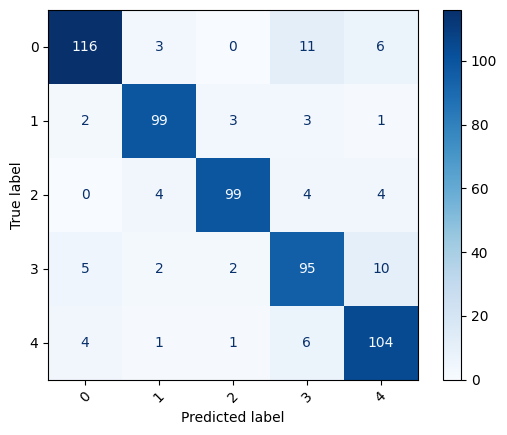

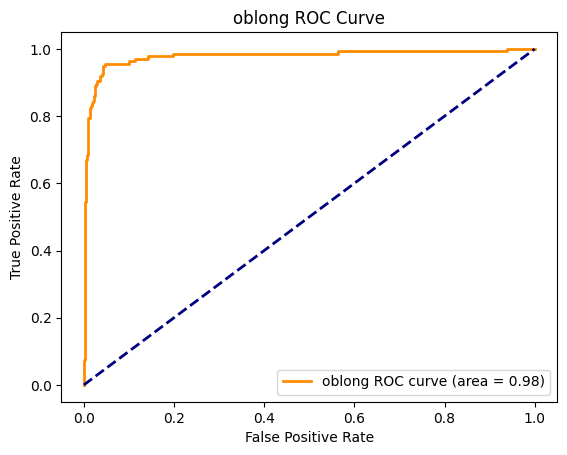

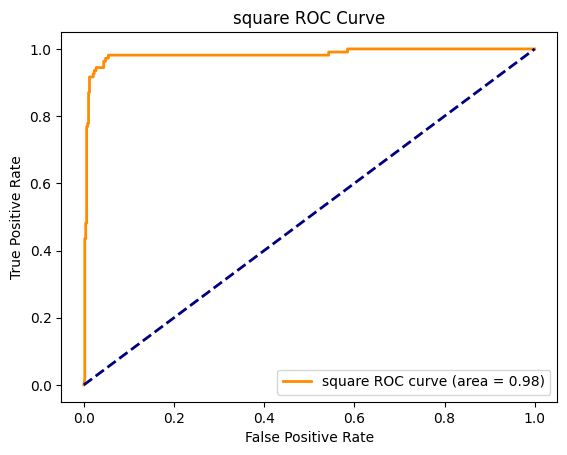

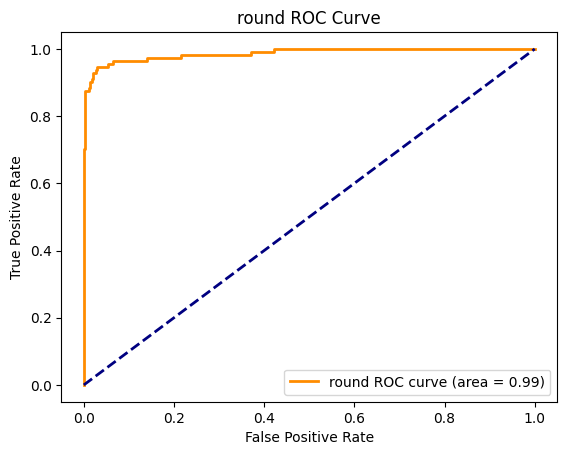

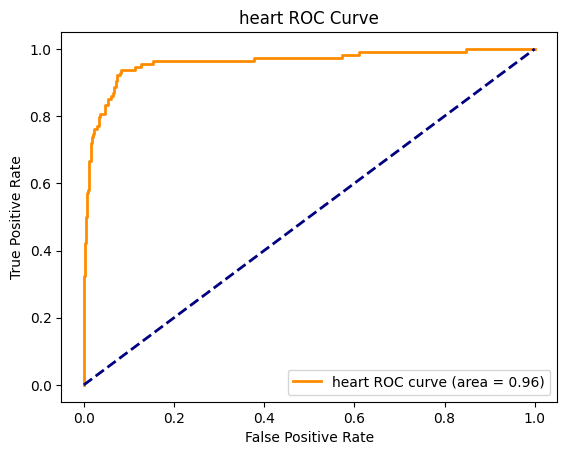

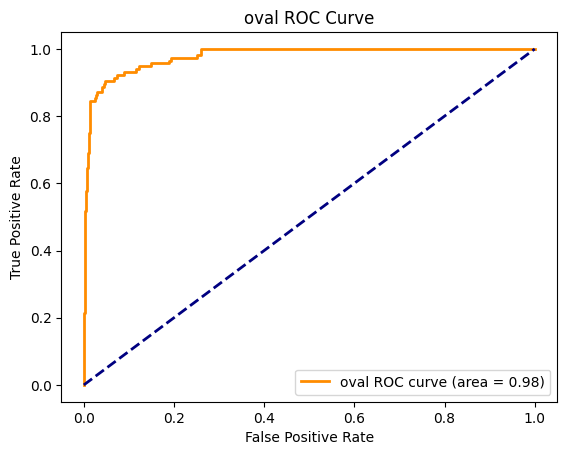

In [40]:
# add all classes

dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.0001, batch_size=128, test_size=0.2, epochs=30, patience=3)


In [41]:
model.save('all.h5')

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/30
11/11 [==============================] - 172s 11s/step - loss: 1.0976 - accuracy: 0.3471 - val_loss: 1.0874 - val_accuracy: 0.3693
Epoch 2/30
11/11 [==============================] - 120s 11s/step - loss: 1.0662 - accuracy: 0.4161 - val_loss: 0.9387 - val_accuracy: 0.5312
Epoch 3/30
11/11 [==============================] - 119s 11s/step - loss: 0.9235 - accuracy: 0.5277 - val_loss: 0.8099 - val_accuracy: 0.6392
Epoch 4/30
11/11 [==============================] - 120s 11s/step - loss: 0.8453 - accuracy: 0.5832 - val_loss: 0.7939 - val_accuracy: 0.5994
Epoch 5/30
11/11 [==============================] - 119s 11s/step - loss: 0.7856 - accuracy: 0.6486 - val_loss: 0.6946 - val_accuracy: 0.7074
Epoch 6/30
11/11 [==============================] - 119s 11s/step - loss: 0.7075 - accuracy: 0.6984 - val_loss: 0.5640 - val_accuracy: 0.7841
Epoch 7/30
11/11 [==============================] - 119s 11s/step - loss: 0.6585 - accuracy: 0.7255 - val_loss: 0.5900 - val_accuracy: 0.7670
Epoch 

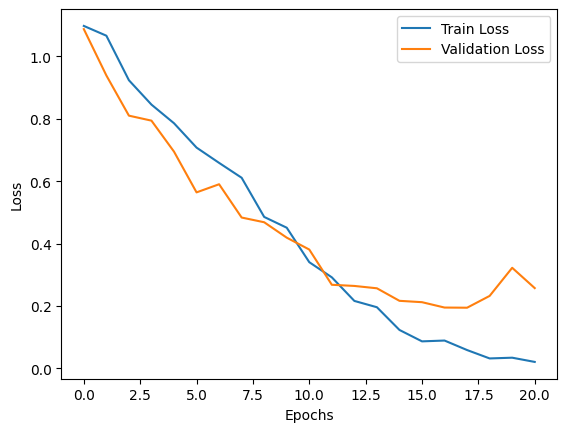

11/11 [==============================] - 7s 605ms/step
Classification Report:
              precision    recall  f1-score   support

      oblong       0.95      0.94      0.95       130
      square       0.95      0.93      0.94       112
       round       0.91      0.95      0.93       110

    accuracy                           0.94       352
   macro avg       0.94      0.94      0.94       352
weighted avg       0.94      0.94      0.94       352



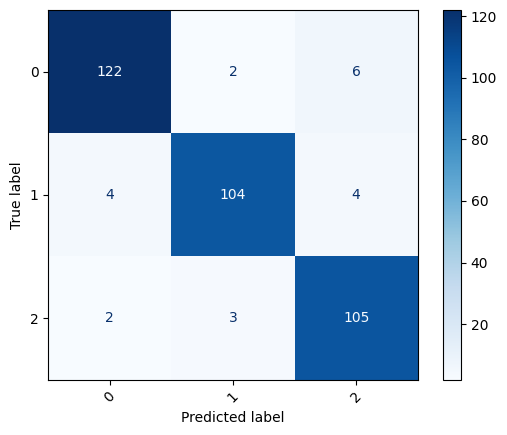

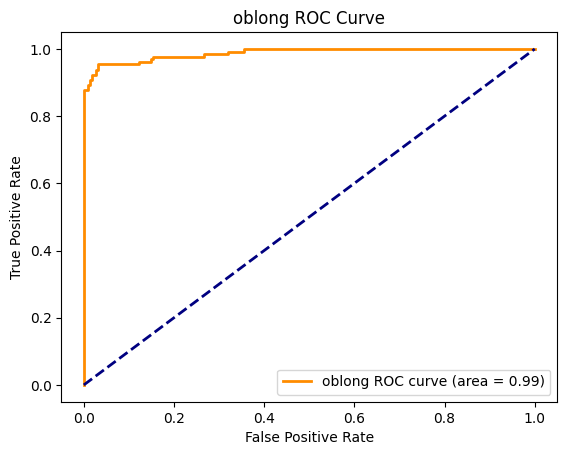

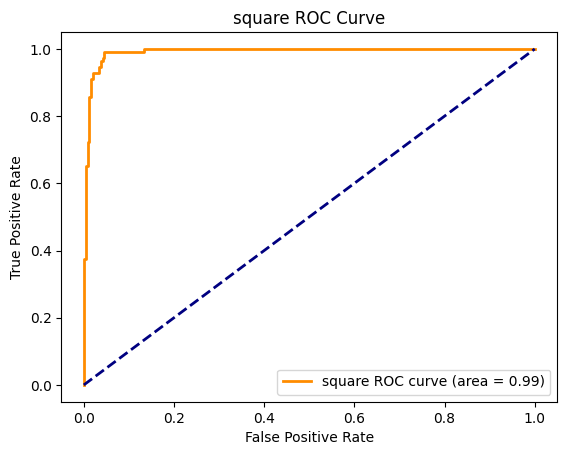

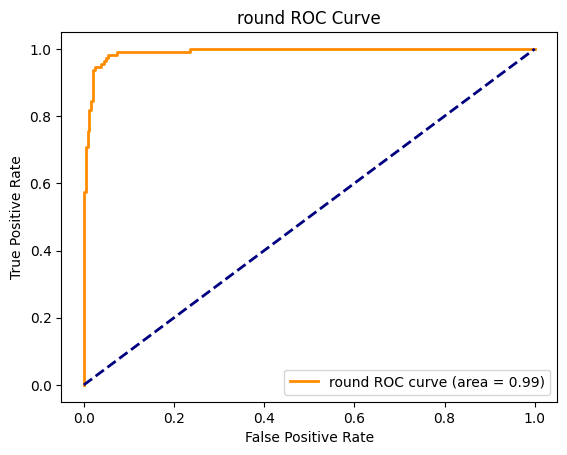

In [25]:
# 3 classes

dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.0001, batch_size=128, test_size=0.2, epochs=30, patience=3)

In [26]:
model.save('3.h5')

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/20
11/11 [==============================] - 147s 12s/step - loss: 1.2581 - accuracy: 0.3257 - val_loss: 1.1078 - val_accuracy: 0.3267
Epoch 2/20
11/11 [==============================] - 119s 11s/step - loss: 1.1462 - accuracy: 0.3378 - val_loss: 1.0830 - val_accuracy: 0.3182
Epoch 3/20
11/11 [==============================] - 120s 11s/step - loss: 1.0729 - accuracy: 0.4097 - val_loss: 1.0548 - val_accuracy: 0.4886
Epoch 4/20
11/11 [==============================] - 119s 11s/step - loss: 1.0116 - accuracy: 0.4644 - val_loss: 0.9237 - val_accuracy: 0.5483
Epoch 5/20
11/11 [==============================] - 118s 11s/step - loss: 0.9130 - accuracy: 0.5349 - val_loss: 0.8572 - val_accuracy: 0.5994
Epoch 6/20
11/11 [==============================] - 117s 11s/step - loss: 0.8594 - accuracy: 0.5605 - val_loss: 0.8341 - val_accuracy: 0.5881
Epoch 7/20
11/11 [==============================] - 120s 11s/step - loss: 0.8667 - accuracy: 0.5768 - val_loss: 0.7908 - val_accuracy: 0.6790
Epoch 

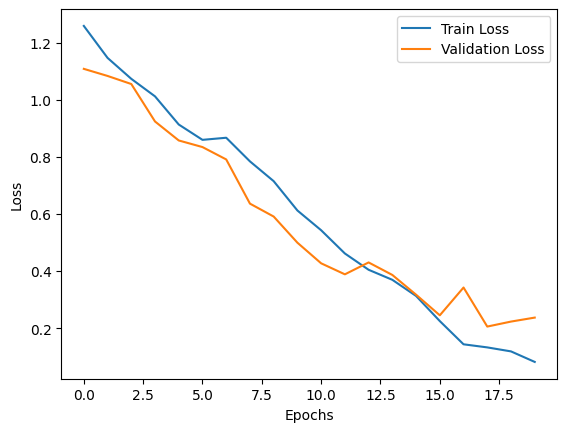

11/11 [==============================] - 7s 611ms/step
Classification Report:
              precision    recall  f1-score   support

      oblong       0.86      0.96      0.91       130
      square       0.94      0.85      0.89       112
       round       0.95      0.92      0.94       110

    accuracy                           0.91       352
   macro avg       0.92      0.91      0.91       352
weighted avg       0.92      0.91      0.91       352



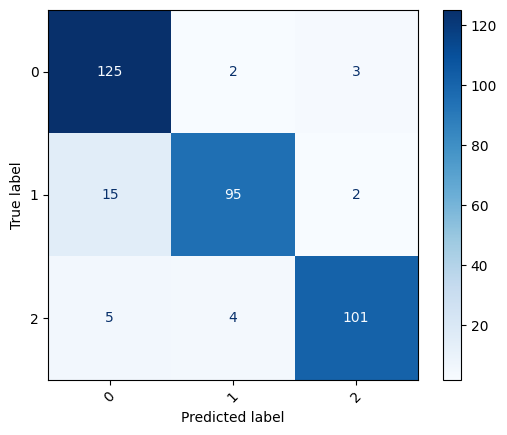

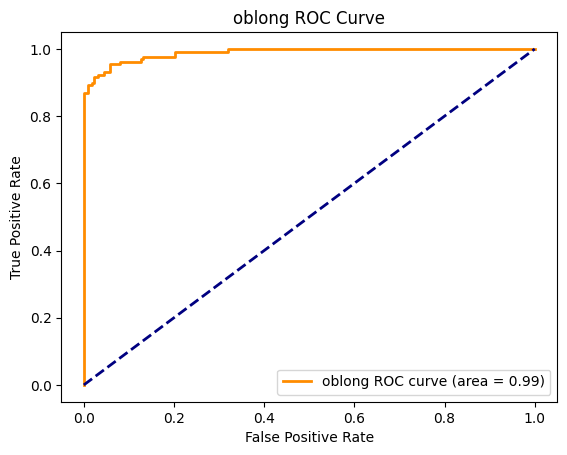

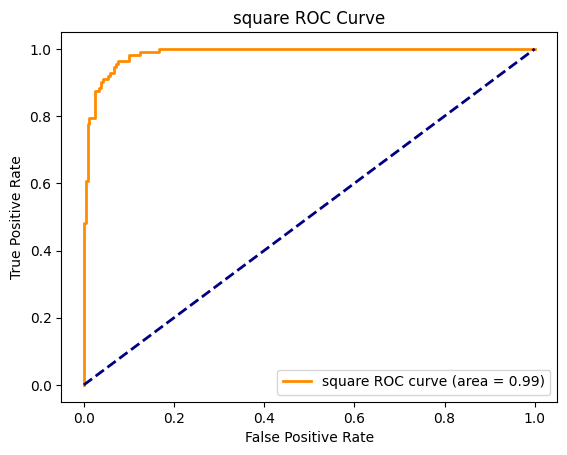

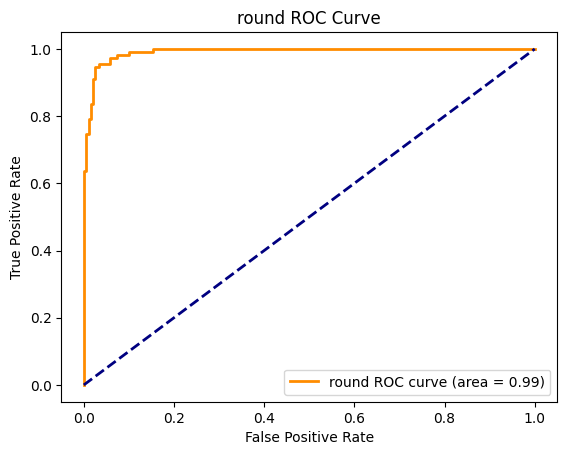

In [20]:
# FINAL 

dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.0001, batch_size=128, test_size=0.2, epochs=20, patience=3)

In [21]:
model.save('shape_final.h5')

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/20
11/11 [==============================] - 128s 11s/step - loss: 1.2465 - accuracy: 0.3201 - val_loss: 1.1206 - val_accuracy: 0.3125
Epoch 2/20
11/11 [==============================] - 123s 11s/step - loss: 1.1106 - accuracy: 0.3791 - val_loss: 1.0617 - val_accuracy: 0.3324
Epoch 3/20
11/11 [==============================] - 124s 11s/step - loss: 1.0423 - accuracy: 0.4474 - val_loss: 0.9336 - val_accuracy: 0.5795
Epoch 4/20
11/11 [==============================] - 120s 11s/step - loss: 0.9312 - accuracy: 0.5206 - val_loss: 0.8392 - val_accuracy: 0.6023
Epoch 5/20
11/11 [==============================] - 121s 11s/step - loss: 0.8786 - accuracy: 0.5683 - val_loss: 0.8880 - val_accuracy: 0.5710
Epoch 6/20
11/11 [==============================] - 123s 11s/step - loss: 0.8609 - accuracy: 0.5825 - val_loss: 0.8058 - val_accuracy: 0.6989
Epoch 7/20
11/11 [==============================] - 132s 12s/step - loss: 0.7838 - accuracy: 0.6451 - val_loss: 0.6497 - val_accuracy: 0.7443
Epoch 

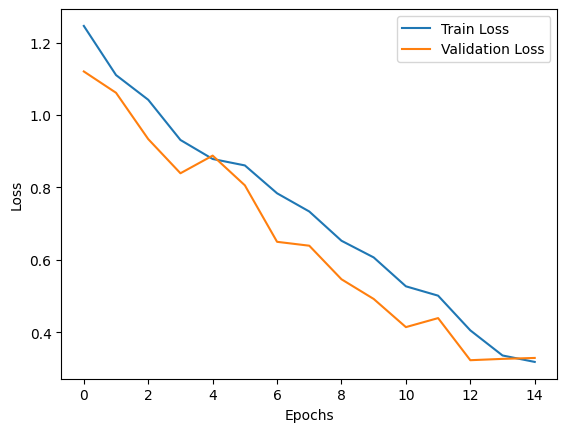

11/11 [==============================] - 7s 609ms/step
Classification Report:
              precision    recall  f1-score   support

      oblong       0.87      0.95      0.91       130
      square       0.89      0.79      0.84       112
       round       0.90      0.91      0.90       110

    accuracy                           0.89       352
   macro avg       0.89      0.88      0.88       352
weighted avg       0.89      0.89      0.89       352



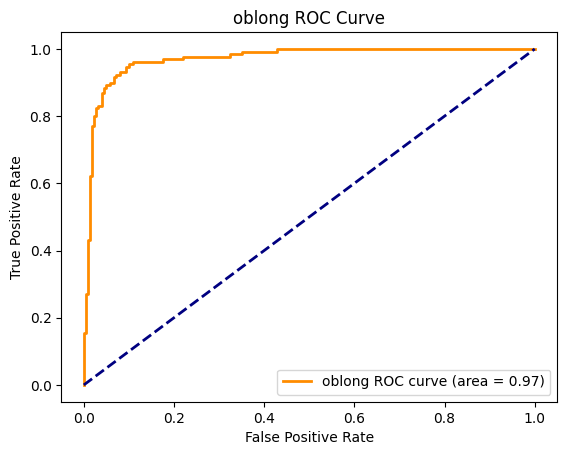

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


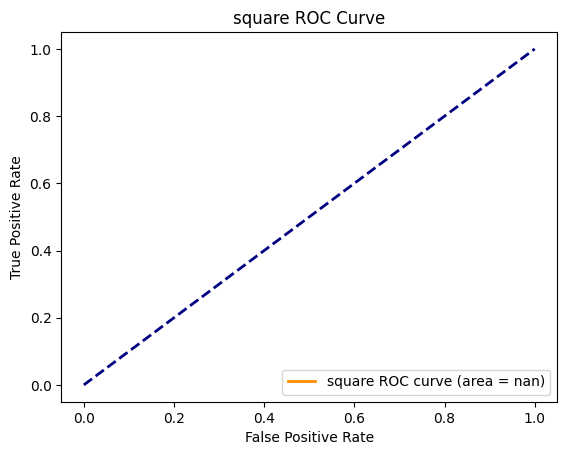

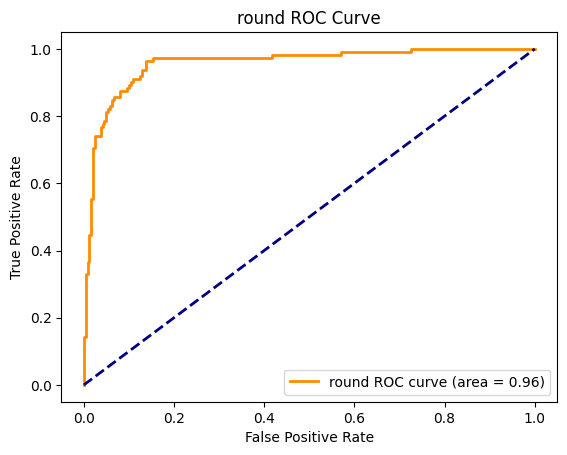

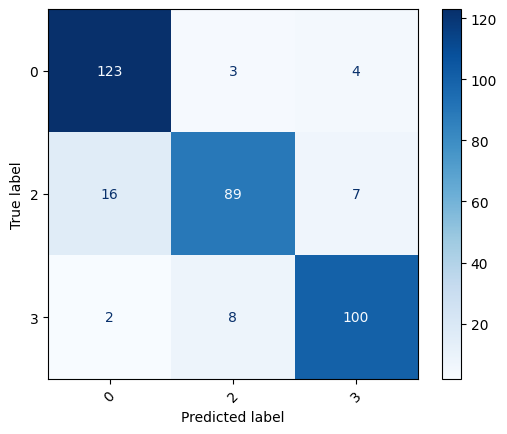

In [9]:
dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.0001, batch_size=128, test_size=0.2, epochs=20, patience=2)

In [10]:
model.save('shape1.h5')

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
11/11 [==============================] - 139s 11s/step - loss: 1.2175 - accuracy: 0.3570 - val_loss: 1.1248 - val_accuracy: 0.3182
Epoch 2/2
44/44 [==============================] - 26s 595ms/step - loss: 1.0097 - accuracy: 0.5270
Test Loss: 1.0145, Test Accuracy: 0.5142
Train Loss: 1.0097, Train Accuracy: 0.5270


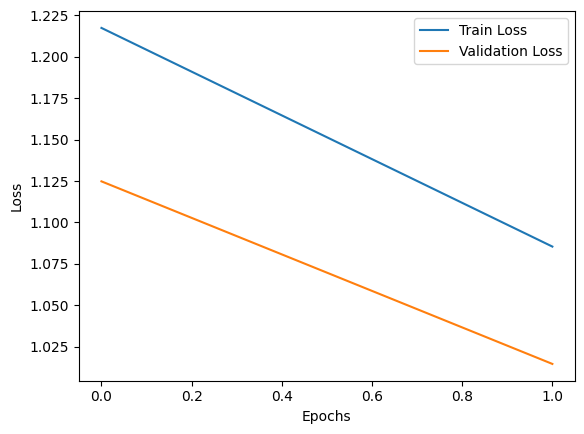

11/11 [==============================] - 7s 616ms/step
Classification Report:
              precision    recall  f1-score   support

      oblong       0.88      0.05      0.10       130
      square       0.41      0.96      0.57       112
       round       0.84      0.60      0.70       110

    accuracy                           0.51       352
   macro avg       0.71      0.54      0.46       352
weighted avg       0.71      0.51      0.44       352



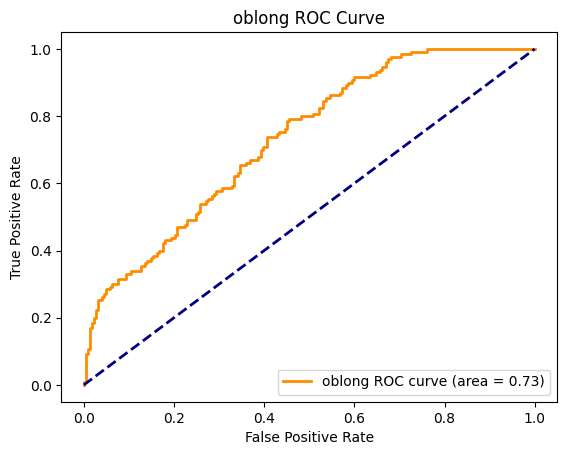

C:\Users\Mahmoud\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


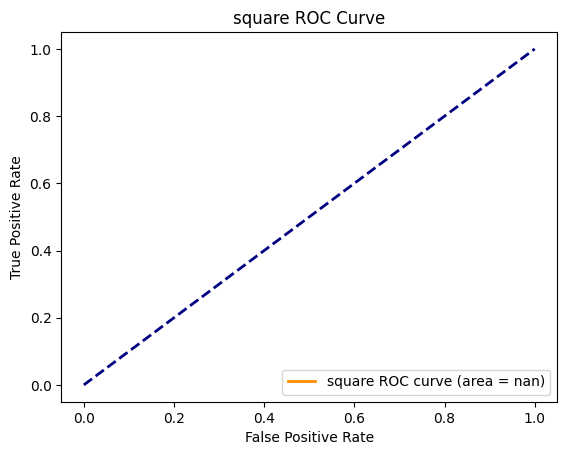

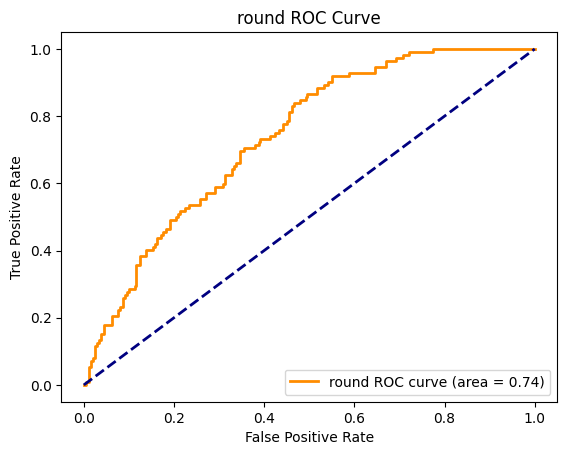

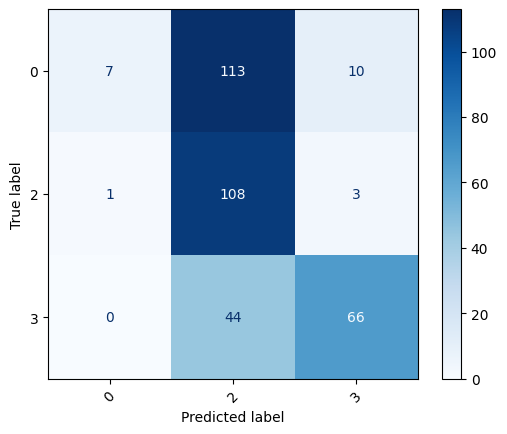

In [24]:
dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.0001, batch_size=128, test_size=0.2, epochs=2, patience=2)

Epoch 1/20
11/11 [==============================] - 151s 12s/step - loss: 1.2372 - accuracy: 0.3321 - val_loss: 1.0714 - val_accuracy: 0.6193
Epoch 2/20
11/11 [==============================] - 118s 11s/step - loss: 1.0882 - accuracy: 0.4004 - val_loss: 1.0378 - val_accuracy: 0.6193
Epoch 3/20
11/11 [==============================] - 119s 11s/step - loss: 1.0166 - accuracy: 0.4822 - val_loss: 0.8991 - val_accuracy: 0.5625
Epoch 4/20
11/11 [==============================] - 118s 11s/step - loss: 0.9256 - accuracy: 0.5398 - val_loss: 0.8237 - val_accuracy: 0.6392
Epoch 5/20
11/11 [==============================] - 118s 11s/step - loss: 0.8635 - accuracy: 0.5754 - val_loss: 0.7473 - val_accuracy: 0.6818
Epoch 6/20
11/11 [==============================] - 118s 11s/step - loss: 0.7987 - accuracy: 0.6252 - val_loss: 0.7213 - val_accuracy: 0.6591
Epoch 7/20
11/11 [==============================] - 117s 11s/step - loss: 0.7312 - accuracy: 0.6728 - val_loss: 0.6052 - val_accuracy: 0.7841
Epoch 

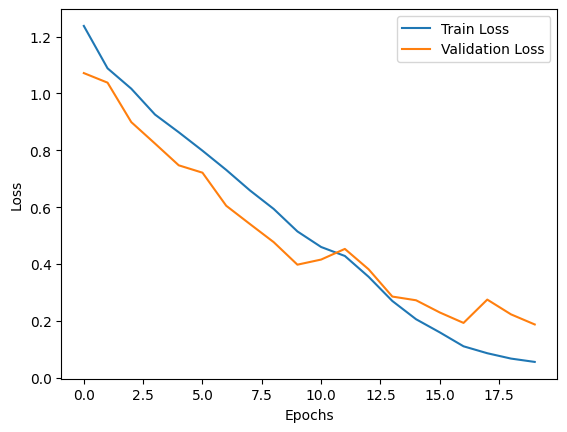

11/11 [==============================] - 7s 605ms/step


ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (3).

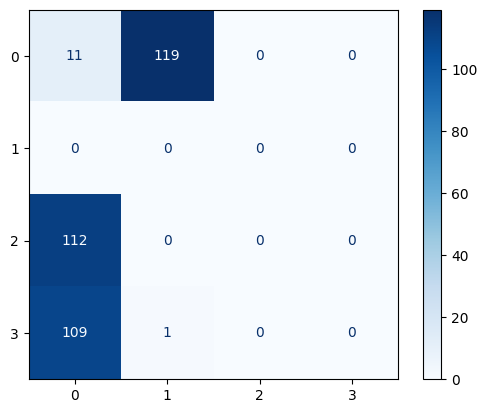

In [15]:
dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.0001, batch_size=128, test_size=0.2, epochs=20, patience=3)

Epoch 1/20
74/74 [==============================] - 329s 4s/step - loss: 1.6025 - accuracy: 0.2272 - val_loss: 1.5391 - val_accuracy: 0.2923
Epoch 2/20
74/74 [==============================] - 312s 4s/step - loss: 1.4623 - accuracy: 0.3534 - val_loss: 1.4434 - val_accuracy: 0.3299
Epoch 3/20
74/74 [==============================] - 309s 4s/step - loss: 1.3485 - accuracy: 0.4262 - val_loss: 1.4766 - val_accuracy: 0.4410
Epoch 4/20
74/74 [==============================] - 311s 4s/step - loss: 1.1792 - accuracy: 0.5220 - val_loss: 1.4930 - val_accuracy: 0.3795
Epoch 5/20
74/74 [==============================] - 309s 4s/step - loss: 1.0511 - accuracy: 0.5837 - val_loss: 1.1845 - val_accuracy: 0.5504
Epoch 6/20
74/74 [==============================] - 312s 4s/step - loss: 0.7873 - accuracy: 0.6996 - val_loss: 1.0107 - val_accuracy: 0.6325
Epoch 7/20
74/74 [==============================] - 306s 4s/step - loss: 0.6068 - accuracy: 0.7754 - val_loss: 0.9178 - val_accuracy: 0.6838
Epoch 8/20
74

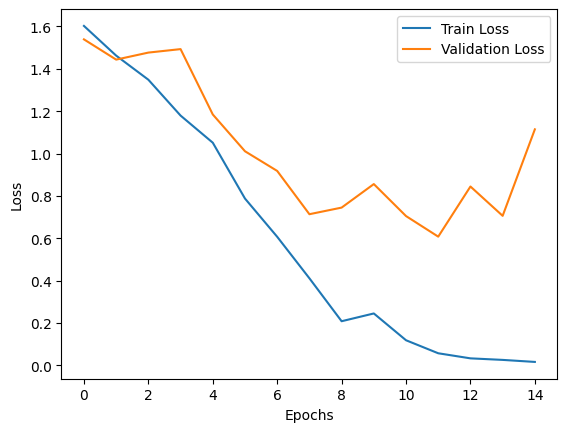

19/19 [==============================] - 11s 571ms/step


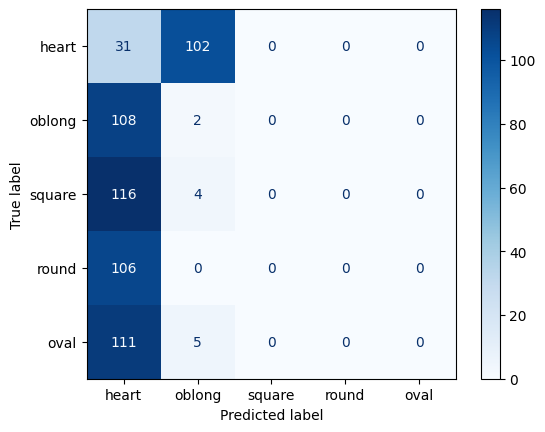

In [7]:
dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.0001, batch_size=32, test_size=0.2, epochs=20, patience=3)

Epoch 1/5
74/74 [==============================] - 329s 4s/step - loss: 1.6099 - accuracy: 0.2071 - val_loss: 1.5983 - val_accuracy: 0.3077
Epoch 2/5
74/74 [==============================] - 316s 4s/step - loss: 1.5019 - accuracy: 0.3179 - val_loss: 1.5319 - val_accuracy: 0.2735
Epoch 3/5
74/74 [==============================] - 315s 4s/step - loss: 1.4231 - accuracy: 0.3757 - val_loss: 1.4745 - val_accuracy: 0.3726
Epoch 4/5
74/74 [==============================] - 311s 4s/step - loss: 1.2651 - accuracy: 0.4626 - val_loss: 1.4492 - val_accuracy: 0.4051
Epoch 5/5
74/74 [==============================] - 43s 585ms/step - loss: 0.8376 - accuracy: 0.6782
Test Loss: 1.1748, Test Accuracy: 0.5487
Train Loss: 0.8376, Train Accuracy: 0.6782


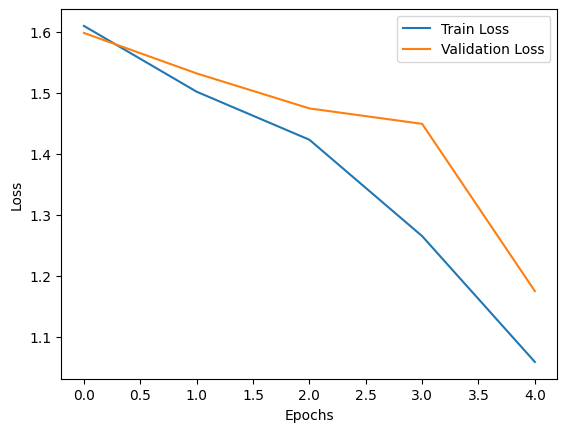

19/19 [==============================] - 11s 579ms/step


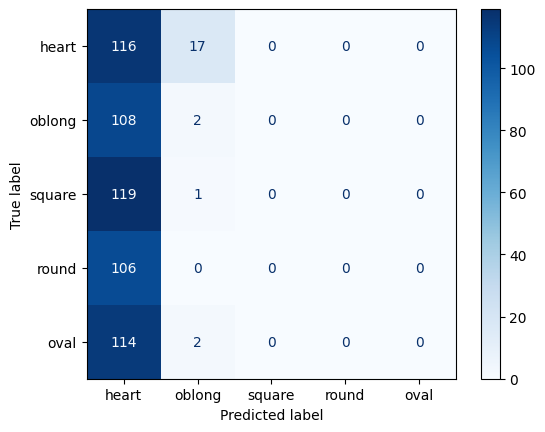

In [16]:
dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.0001, batch_size=32, test_size=0.2, epochs=5, patience=3)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def train_kvgg(dataset, labels, learning_rate=0.001, batch_size=32, n_folds=5, epochs=10, patience=3):
    # Create and compile the VGGNet16 model
    model = create_vggnet16_model()
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Define early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

    # Initialize StratifiedKFold
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    # Lists to store results from each fold
    test_losses, test_accuracies = [], []
    train_losses, train_accuracies = [], []
    all_y_test, all_y_pred_classes = [], []
    histories = []  # List to store training histories

    # K-fold cross-validation loop
    for fold, (train_index, test_index) in enumerate(skf.split(dataset, labels)):
        X_train, X_test = dataset[train_index], dataset[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

        # Train the model for this fold
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stopping])

        # Store the training history for this fold
        histories.append(history)

        # Evaluate the model on the test set for this fold
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)

        # Evaluate the model on the train set for this fold
        train_loss, train_accuracy = model.evaluate(X_train, y_train)
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)

        # Store true and predicted values for the final confusion matrix
        y_pred = model.predict(X_test)
        y_pred_classes = (y_pred > 0.5).astype("int32")
        all_y_test.extend(y_test)
        all_y_pred_classes.extend(y_pred_classes)

    # Print average test loss, test accuracy, train loss, and train accuracy across folds
    avg_test_loss = np.mean(test_losses)
    avg_test_accuracy = np.mean(test_accuracies)
    avg_train_loss = np.mean(train_losses)
    avg_train_accuracy = np.mean(train_accuracies)
    print(f"Average Test Loss: {avg_test_loss:.4f}, Average Test Accuracy: {avg_test_accuracy:.4f}")
    print(f"Average Train Loss: {avg_train_loss:.4f}, Average Train Accuracy: {avg_train_accuracy:.4f}")

    # Plot confusion matrix for all folds
    final_confusion_matrix = confusion_matrix(all_y_test, all_y_pred_classes)
    plt.figure(figsize=(5, 5))
    sns.heatmap(final_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 12})
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Final Confusion Matrix")
    plt.show()
    return model


In [ ]:
# Kfold = 5 data = 1000
dataset = np.array(dataset)
labels = np.array(labels)

model = train_kvgg(dataset, labels, learning_rate=0.001, batch_size=32,n_folds= 5, epochs=10, patience=3)


In [ ]:
# Final Model (proper augmentation) Class_num = 2500 , total subjects 5000  
dataset = np.array(dataset)
labels = np.array(labels)

model = train_vgg(dataset, labels, learning_rate=0.0001, batch_size=32, test_size=0.2, epochs=5, patience=2)

In [ ]:
model.save('model.h5')